In [39]:
# House Price Prediction In Egypt

In [24]:
# Load the dataset 

import pandas as pd

df = pd.read_csv("../DataSets/Egypt_Houses_Price.csv")

In [25]:
# Data cleaning

from sklearn import preprocessing
import numpy as np

# Replace specific values in the 'Level' column
df['Level'] = df['Level'].replace({'Unknown': 0, 'Ground': 0, '10+': 10, 'Highest': 11})
df['Price'] = pd.to_numeric(df["Price"], errors='coerce')
df['Price'] += 3000000 # As we in 2024
df['Price_log'] = np.log1p(df['Price'])

#--------------------------------------------------------------------------------------

X = df[["Type","Area","Bedrooms","Bathrooms","Level","Furnished","City"]]
y = df["Price"]

#--------------------------------------------------------------------------------------

# Turn non-numeric values into numerical

label_type = preprocessing.LabelEncoder()
X["Type"] = label_type.fit_transform(X["Type"])
#X.loc[:, "Type"] = label_type.fit_transform(X["Type"]) # Use .loc

label_furnished = preprocessing.LabelEncoder()
X["Furnished"] = label_furnished.fit_transform(X["Furnished"])
#X.loc[:, "Furnished"] = label_furnished.fit_transform(X["Furnished"])  # Use .loc

label_city = preprocessing.LabelEncoder()
X["City"] = label_city.fit_transform(X["City"])
#X.loc[:, "City"] = label_city.fit_transform(X["City"])  # Use .loc

# .loc to avoid SettingWithCopyWarning

#--------------------------------------------------------------------------------------

# Addititon to print corresponding values
#for original, encoded in zip(label_type.classes_, range(len(label_type.classes_))):
#    print(f"{original}: {encoded}")


In [26]:
# Turn object types to numerical 

for c in ['Type', 'Area', 'Bedrooms', 'Bathrooms', 'Level', 'Furnished', 'City']:
    X[c] = pd.to_numeric(X[c], errors="coerce")

#Filling NUll values with mean, is better than removing it

X["Area"].fillna(X["Area"].mean(), inplace=True)
X["Bedrooms"].fillna(X["Bedrooms"].mean(), inplace=True)
X["Bathrooms"].fillna(X["Bathrooms"].mean(), inplace=True)

y.fillna(y.mean(), inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_20060\4221383670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = pd.to_numeric(X[c], errors="coerce")
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_20060\4221383670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Area"].fillna(X["Area"].mean(), inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_20060\4221383670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [27]:
# Training the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


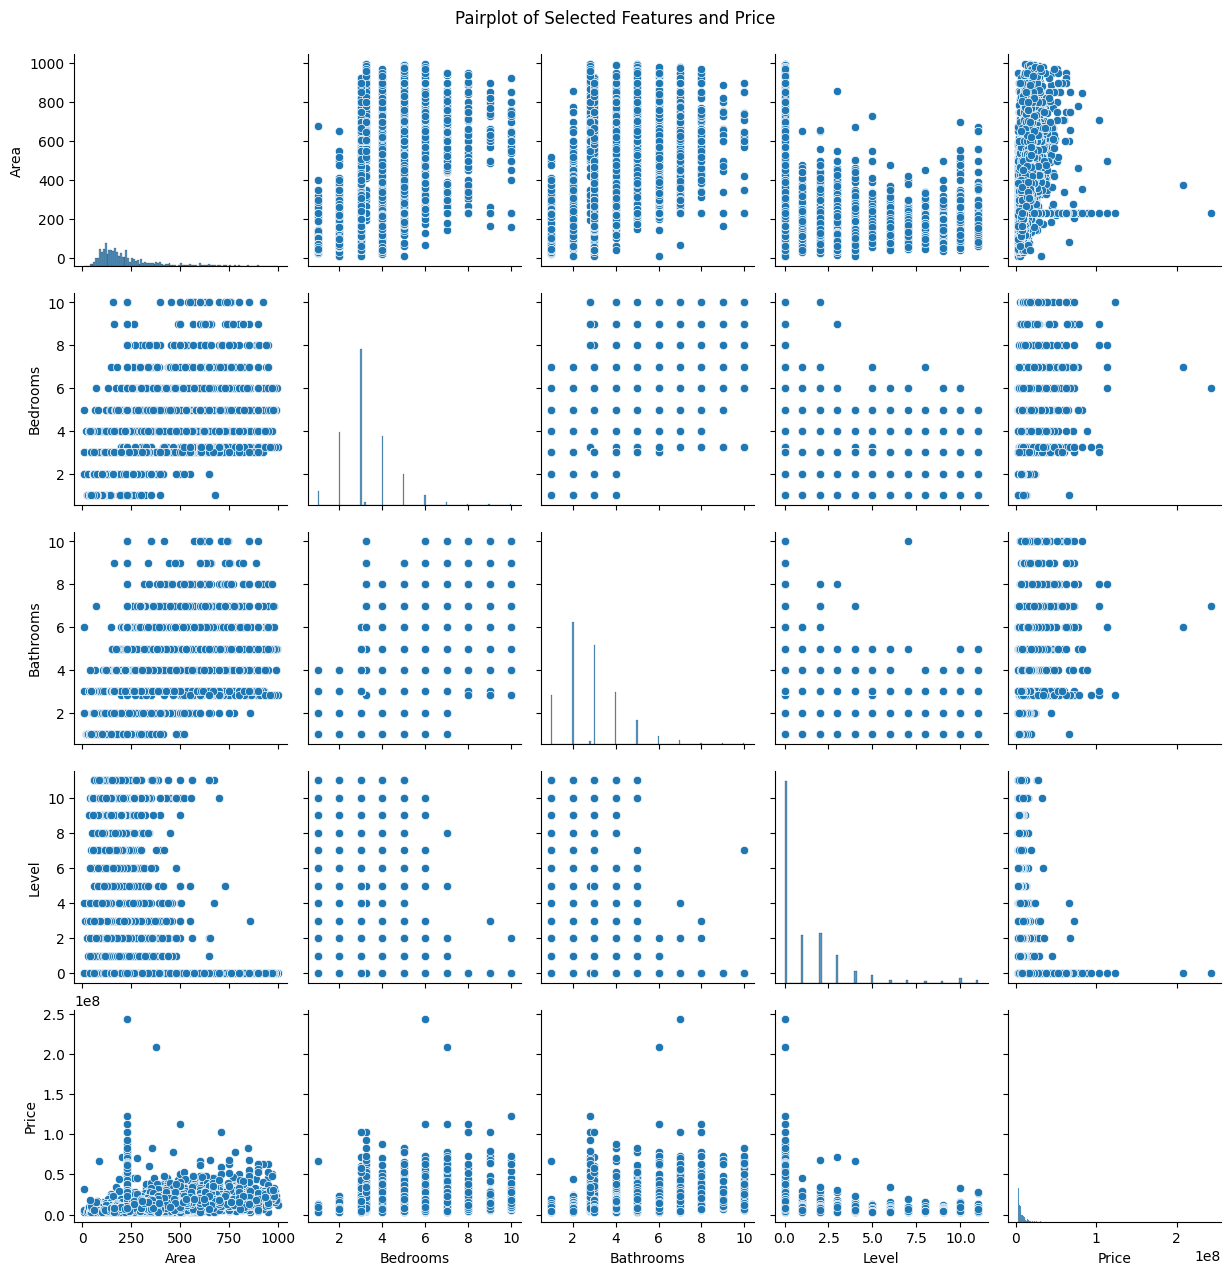

In [37]:
# Data Visuallization

import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target variable into a single DataFrame
data_combined = pd.concat([X, y], axis=1) 

# Select the specific columns to visualize
columns_to_plot = ['Area', 'Bedrooms', 'Bathrooms', 'Level', 'Price']
data_subset = data_combined[columns_to_plot]

# Use pairplot
sns.pairplot(data_subset)
plt.suptitle('Pairplot of Selected Features and Price', y=1.02) 
plt.show()

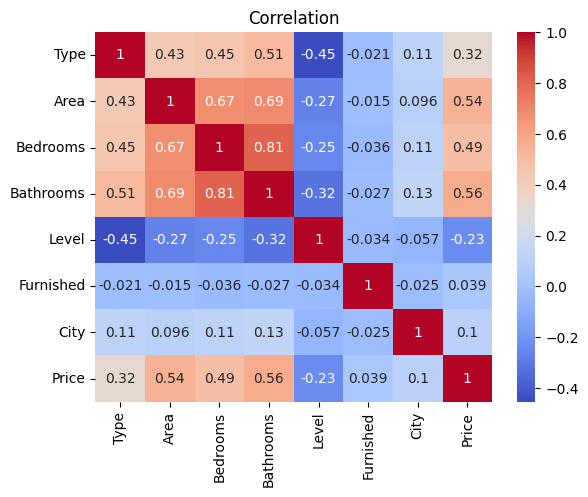

In [36]:
# Show the Correlation Matrix

corr_matrix = data_combined.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

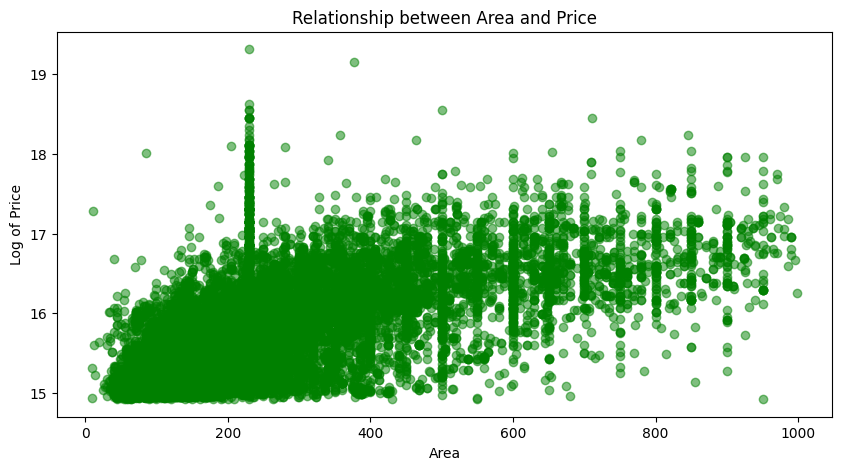

In [35]:
# Plot relationship between Area and Log Of Price

plt.figure(figsize=(10, 5))
plt.scatter(X['Area'], df["Price_log"], alpha=.5, c="g")  
plt.title('Relationship between Area and Price')
plt.xlabel('Area')
plt.ylabel('Log of Price')
plt.show()



In [10]:
# Modeling the data

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))
y1_pred = lm.predict(X_test)

0.4007321503705201


In [11]:
# Evaluate our model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lm.fit(X_train_poly, y_train)
print(lm.score(X_test_poly, y_test))
y2_pred = lm.predict(X_test_poly)

0.45234065288989256


In [12]:
# Other method for the evaluation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test,y_test)
y3_pred = forest.predict(X_test)

In [40]:
# Claculate the error for each model to use the best

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae1 = mean_absolute_error(y_test, y1_pred)
mse1 = mean_squared_error(y_test, y1_pred)
r21 = r2_score(y_test, y1_pred)
print(f'Mean Absolute Error 1: {mae1}')
print(f'Mean Squared Error 1: {mse1}')
print(f'R² Score 1: {r21}')

print(f'-----------------------------------------')
mae2 = mean_absolute_error(y_test, y2_pred)
mse2 = mean_squared_error(y_test, y2_pred)
r22 = r2_score(y_test, y2_pred)
print(f'Mean Absolute Error 2: {mae2}')
print(f'Mean Squared Error 2: {mse2}')
print(f'R² Score 2: {r22}')

print(f'-----------------------------------------')
mae3 = mean_absolute_error(y_test, y3_pred)
mse3 = mean_squared_error(y_test, y3_pred)
r23 = r2_score(y_test, y3_pred)
print(f'Mean Absolute Error 3: {mae3}')
print(f'Mean Squared Error 3: {mse3}')
print(f'R² Score 3: {r23}')

Mean Absolute Error 1: 5038372.956845673
Mean Squared Error 1: 64524543641245.45
R² Score 1: -0.37223834546823253
-----------------------------------------
Mean Absolute Error 2: 4981627.99069503
Mean Squared Error 2: 67312866580957.62
R² Score 2: -0.4315373879952984
-----------------------------------------
Mean Absolute Error 3: 5141240.577384456
Mean Squared Error 3: 77582345849184.38
R² Score 3: -0.6499375880525644


In [14]:
def get_user_input():
       
    print("Please enter the following details for your property:")
    property_type = input("Type (Apartment, Duplex, Stand Alone Villa, Chalet): ")
    area = float(input("Area (in square meters): "))
    bedrooms = int(input("Number of Bedrooms: "))
    bathrooms = int(input("Number of Bathrooms: "))
    level = input("Level (Ground, 1, 2, 10+): ")
    furnished = input("Furnished (Yes or No): ")
    city = input("City (New Cairo - El Tagamoa | North Coast | Sheikh Zayed | 6th of October | Ain Sukhna ,....): ")

    # Prepare the input for prediction
    new_data = pd.DataFrame({
        'Type': [property_type],
        'Area': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Level': [level],
        'Furnished': [furnished],
        'City': [city]
    })

    # Preprocess new data
    new_data['Level'] = new_data['Level'].replace({'Unknown': 0, 'Ground': 0, '10+': 10, 'Highest': 11})
    new_data['Type'] = label_type.transform(new_data['Type'])
    new_data['Furnished'] = label_furnished.transform(new_data['Furnished'])
    new_data['City'] = label_city.transform(new_data['City'])

    # Make prediction
    prediction = forest.predict(new_data)
    print(f"The predicted price for the property is: {prediction[0]:,.2f} EGP")

# Run the function to get user input
get_user_input()

Please enter the following details for your property:


Type (Apartment, Duplex, Stand Alone Villa, Chalet):  Apartment
Area (in square meters):  200
Number of Bedrooms:  3
Number of Bathrooms:  2
Level (Ground, 1, 2, 10+):  4
Furnished (Yes or No):  No
City (New Cairo - El Tagamoa | North Coast | Sheikh Zayed | 6th of October | Ain Sukhna ,....):  Sheikh Zayed


The predicted price for the property is: 5,185,915.23 EGP
